# The Sparks Foundation

## Data Science and Business Analytics Internship- GRIP May'21

### Task 7:- Stock Market Prediction using Numerical and Textual Analysis

### Author:- Rashi Khandelwal

#### Step 1:- Importing the libraries

In [1]:
# import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# importing libraries reqyired for Textual Analysis
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [3]:
# importing libraries required for Historical Analysis
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [4]:
# importing libraries required for prediction
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# download the historical dataset
import pandas_datareader.data as web
data= web.DataReader("AMZN",'yahoo',start='2005-01-1', end='2020-12-31')
data.to_csv('prices.csv')


#### Step 2:- Import Dataset

In [6]:
# headlines data
headlines_df= pd.read_csv("india-news-headlines.csv",error_bad_lines=False,encoding='latin-1')
# historical data
prices_df= pd.read_csv("prices.csv")

#### Step 3:- Pre-Processing the Data:
##### Headlines Dataset

In [7]:
# headlines data
headlines_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [8]:
headlines_df.shape

(3424067, 3)

In [9]:
headlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [10]:
headlines_df.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [11]:
# drop duplicates
headlines_df.drop_duplicates(inplace=True)

In [12]:
#drop headlines_category
headlines_df= headlines_df.drop(columns=['headline_category'])

In [13]:
headlines_df.head()

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [14]:
# remove special charecters from headline_text
# creating a function 
def remove_special_chars(text):
    
    result = ""
    
    for i in text:
        if i.isalnum() or i == ' ':
            result  = result + i
        else:
            result = result + ""
    return result.strip()

In [15]:
# applying the function to the dataset
headlines_df['headline_text']=headlines_df['headline_text'].apply(remove_special_chars)

In [16]:
headlines_df.rename(columns={'publish_date':'date','headline_text':'headline'},inplace=True)

In [17]:
headlines_df['date']=pd.to_datetime(headlines_df['date'],format='%Y%m%d')

In [18]:
headlines_df.head()

,date,headline
0,2001-01-02,Status quo will not be disturbed at Ayodhya sa...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,Americas unwanted heading for India
3,2001-01-02,For bigwigs it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [19]:
# Group all the headlines for each day

headlines_df['headline']= headlines_df.groupby(['date']).transform(lambda x : ' '.join(x))
headlines_df= headlines_df.drop_duplicates()
headlines_df.reset_index(inplace=True, drop=True)

In [20]:
headlines_df.head()

,date,headline
0,2001-01-02,Status quo will not be disturbed at Ayodhya sa...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...


In [21]:
headlines_df.shape

(7262, 2)

In [22]:
# functions to get subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [23]:
# applying subjectivity and polarity to the columns
headlines_df['Subjectivity']=headlines_df['headline'].apply(getSubjectivity)
headlines_df['Polarity']= headlines_df['headline'].apply(getPolarity)

In [24]:
headlines_df.head()

,date,headline,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya sa...,0.293056,0.193519
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.481895,0.086052
3,2001-01-05,Light combat craft takes India into club class...,0.465542,0.257415
4,2001-01-06,Light combat craft takes India into club class...,0.464935,0.219481


Text(0.5, 1.0, 'Polarity Score')

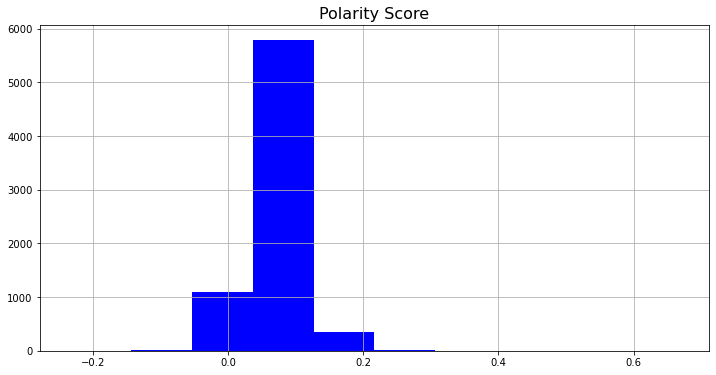

In [25]:
plt.figure(figsize= (12,6))
headlines_df['Polarity'].hist(color= 'blue')
plt.title('Polarity Score',fontsize=16)

Text(0.5, 1.0, 'Subjeectivity Score')

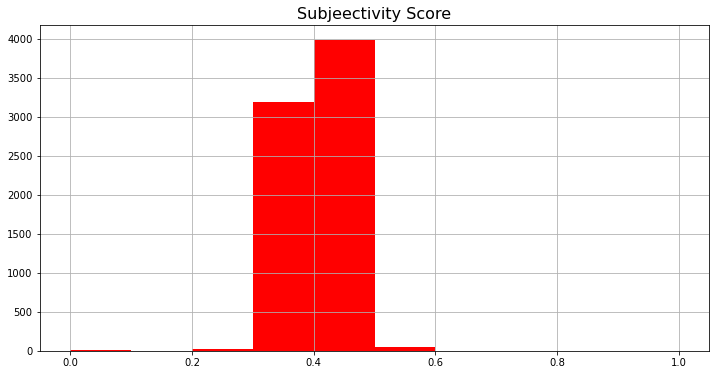

In [26]:
plt.figure(figsize= (12,6))
headlines_df['Subjectivity'].hist(color= 'red')
plt.title('Subjeectivity Score',fontsize=16)

In [27]:
# importing Sentimental Analysis
sia= SentimentIntensityAnalyzer()

In [28]:
headlines_df['Compound']=[sia.polarity_scores(v)['compound'] for v in headlines_df['headline']]

In [29]:
headlines_df['Negative']=[sia.polarity_scores(v)['neg'] for v in headlines_df['headline']]

In [ ]:
headlines_df['Neutral']=[sia.polarity_scores(v)['neu'] for v in headlines_df['headline']]

In [ ]:
headlines_df['Positive']=[sia.polarity_scores(v)['pos'] for v in headlines_df['headline']]

In [34]:
headlines_df.head()

,date,headline,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya sa...,0.293056,0.193519,-0.9839,0.142,0.790,0.068
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462,-0.1779,0.121,0.767,0.112
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.481895,0.086052,0.9294,0.097,0.790,0.113
3,2001-01-05,Light combat craft takes India into club class...,0.465542,0.257415,0.8689,0.123,0.723,0.154
4,2001-01-06,Light combat craft takes India into club class...,0.464935,0.219481,-0.5574,0.165,0.702,0.133


In [35]:
headlines_df.shape

(7262, 8)

In [59]:
headlines_df.rename(columns= {'date':'Date'}, inplace=True)

##### Historical Dataset

In [36]:
prices_df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-12-31,45.490002,44.160000,45.130001,44.290001,4790700,44.290001
1,2005-01-03,45.439999,44.209999,44.950001,44.520000,10446500,44.520000
2,2005-01-04,43.259998,41.500000,42.669998,42.139999,19418500,42.139999
3,2005-01-05,42.759998,41.560001,41.570000,41.770000,8354200,41.770000
4,2005-01-06,42.250000,40.900002,41.810001,41.049999,8700900,41.049999


In [37]:
prices_df= prices_df[['Date','High','Low','Open','Close','Volume']]

In [38]:
len(prices_df)

4029

In [39]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4029 entries, 0 to 4028
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4029 non-null   object 
 1   High    4029 non-null   float64
 2   Low     4029 non-null   float64
 3   Open    4029 non-null   float64
 4   Close   4029 non-null   float64
 5   Volume  4029 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 189.0+ KB


In [40]:
prices_df.dropna(inplace=True)

In [41]:
len(prices_df)

4029

In [42]:
prices_df.describe()

,High,Low,Open,Close,Volume
count,4029.000000,4029.000000,4029.000000,4029.000000,4.029000e+03
mean,616.089419,602.070683,609.490025,609.395438,5.797138e+06
std,781.021388,762.320833,772.457645,771.940250,4.855051e+06
min,26.299999,25.760000,26.090000,26.070000,8.813000e+05
25%,82.529999,79.720001,81.160004,81.080002,3.242500e+06
50%,259.760010,254.699997,257.579987,257.750000,4.704600e+06
75%,822.000000,814.500000,820.400024,818.359985,6.849300e+06
max,3552.250000,3486.689941,3547.000000,3531.449951,1.043292e+08


In [43]:
prices_df['Date']= pd.to_datetime(prices_df['Date'])

##### Data Visulaization

Text(0.5, 1.0, 'Closing Price')

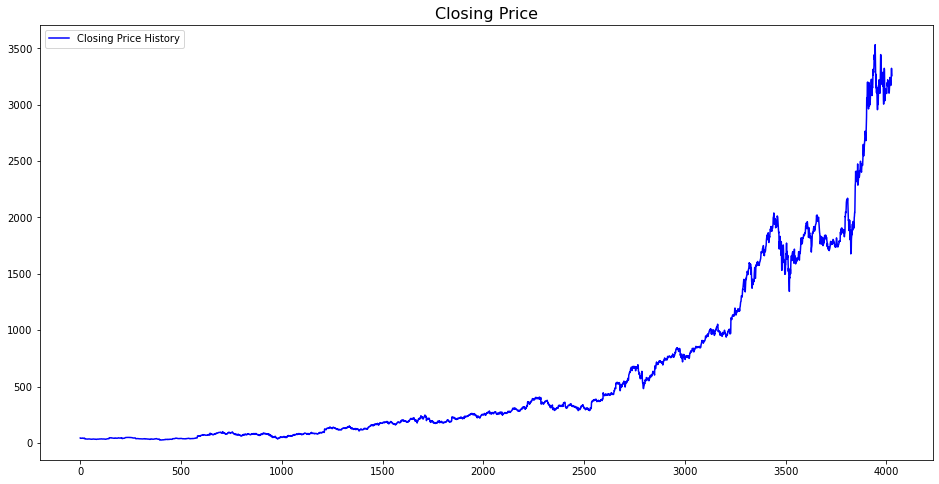

In [44]:
# Closing Price Graph
plt.figure(figsize=(16,8))
plt.plot(prices_df['Close'], label= 'Closing Price History', color='blue')
plt.legend()
plt.title("Closing Price", fontsize=16)

Text(0.5, 1.0, 'Moving Average')

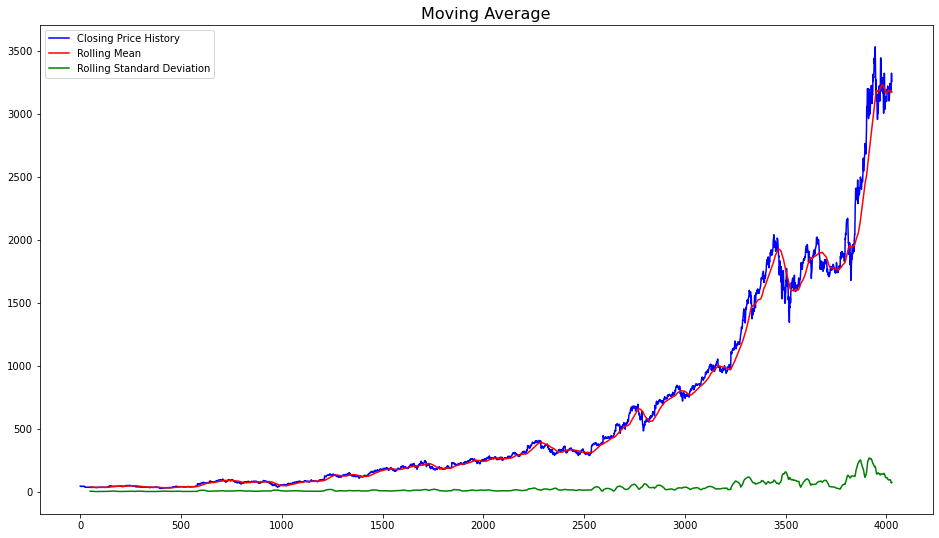

In [45]:
# Plotting Moving average
close= prices_df['Close']

ma= close.rolling(window=50).mean()
std=close.rolling(window=50).std()

plt.figure(figsize=(16,9))
plt.plot(prices_df['Close'], label= 'Closing Price History', color='blue')
plt.plot(ma, label= 'Rolling Mean', color='red')
plt.plot(std, label= 'Rolling Standard Deviation', color='green')
plt.legend()

plt.title("Moving Average", fontsize=16)

Text(0.5, 1.0, 'Returns')

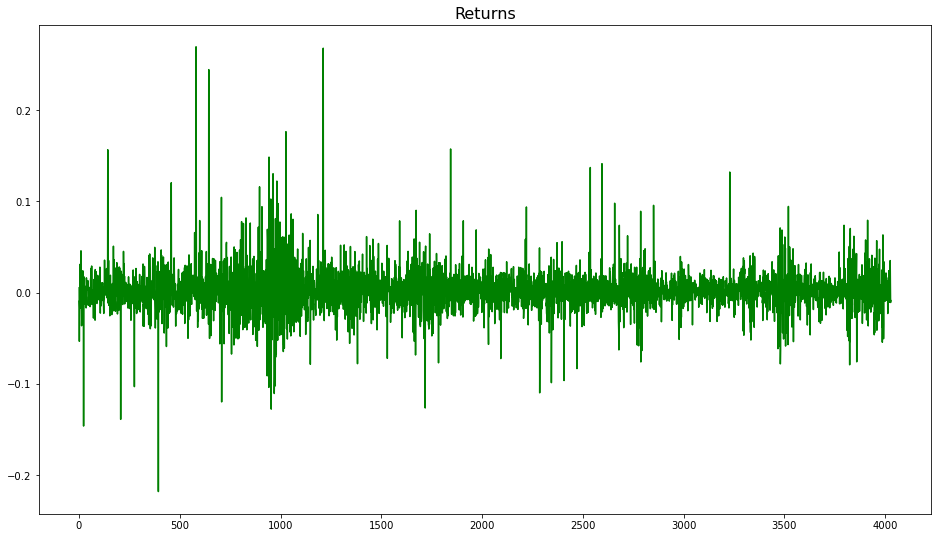

In [46]:
# Plotting Returns

returns= close/close.shift(1)-1

plt.figure(figsize=(16,9))
plt.plot(returns, label='Return',color='green')
plt.title("Returns", fontsize=16)

In [47]:
# Stationarity Test

# defining the function

def test_stationarity(timeseries):
    rolmean= timeseries.rolling(20).mean()
    rolstd= timeseries.rolling(20).std()
    
    # Plotting Rolling Statistics
    
    plt.figure(figsize=(16,9))
    plt.plot(timeseries, color='blue', label='original')
    plt.plot(rolmean, color='red', label='rolling mean')
    plt.plot(rolstd, color='black', label='rolling standard deviation')
    plt.legend()
    plt.title("Rolling Mean and Standard Deviation", fontsize=16)
    plt.show(block=False)
    
    print('Results of dickey fuller test')
    result = adfuller(timeseries, autolag = 'AIC')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
            print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
           print("Weak evidence against null hypothesis, time series is non-stationary ")
    
    

In [48]:
#splitting the data
train, test = prices_df[:3500], prices_df[3500:len(prices_df)]

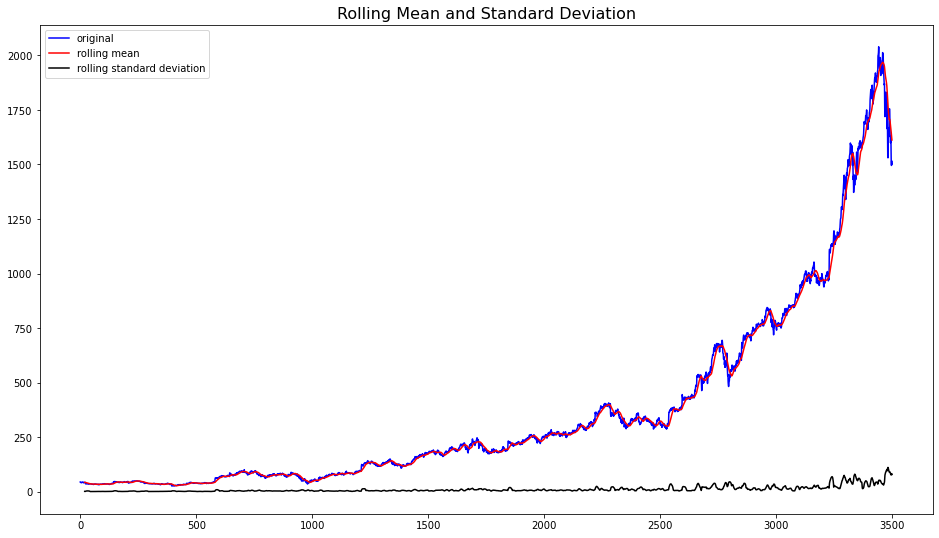

Results of dickey fuller test
ADF Test Statistic : 0.8530306589770885
p-value : 0.9924457048463031
#Lags Used : 27
Number of Observations Used : 3472
Weak evidence against null hypothesis, time series is non-stationary 


In [49]:
# applying stationarity test on train close data
test_stationarity(train['Close'])

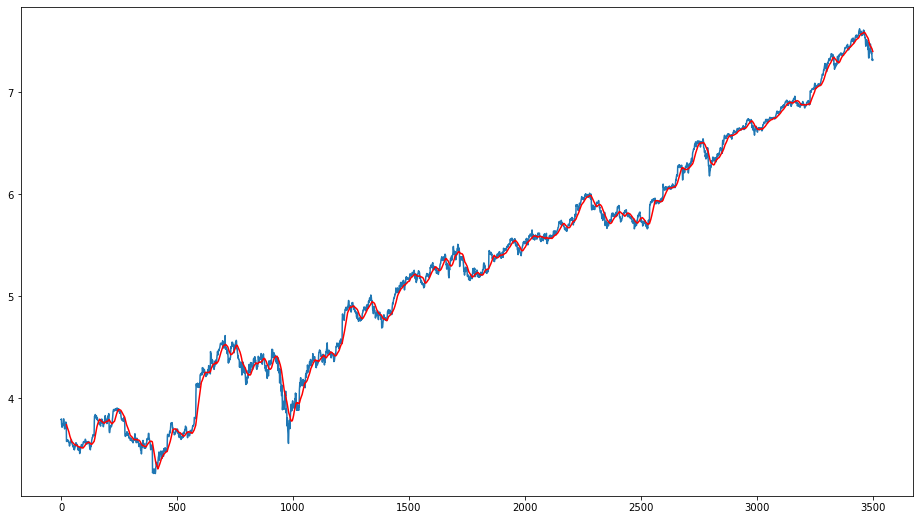

In [50]:
train_log= np.log(train['Close'])
test_log= np.log(test['Close'])

mav= train_log.rolling(24).mean()
plt.figure(figsize=(16,9))
plt.plot(train_log)
plt.plot(mav, color='red')

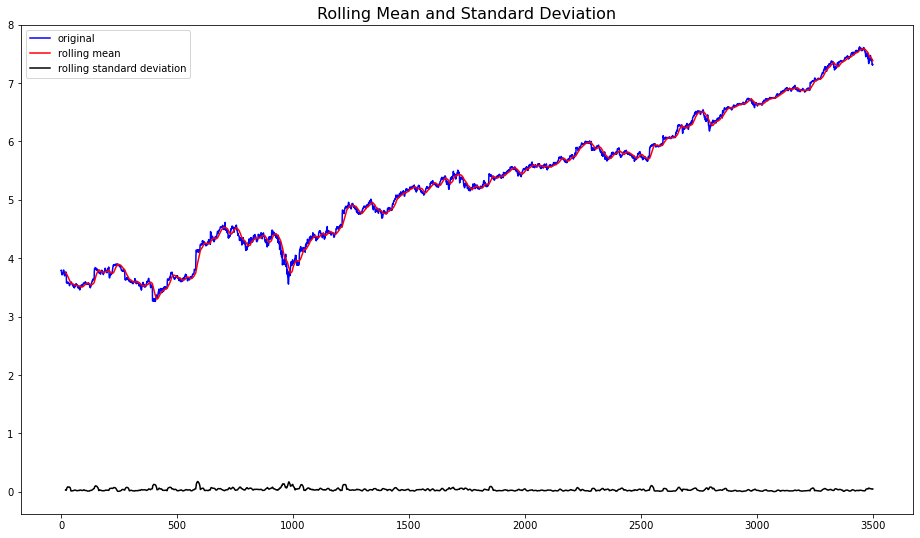

Results of dickey fuller test
ADF Test Statistic : -0.025584057480775708
p-value : 0.9563644651949992
#Lags Used : 2
Number of Observations Used : 3497
Weak evidence against null hypothesis, time series is non-stationary 


In [51]:
train_log.dropna(inplace=True)
test_log.dropna(inplace=True)

test_stationarity(train_log)

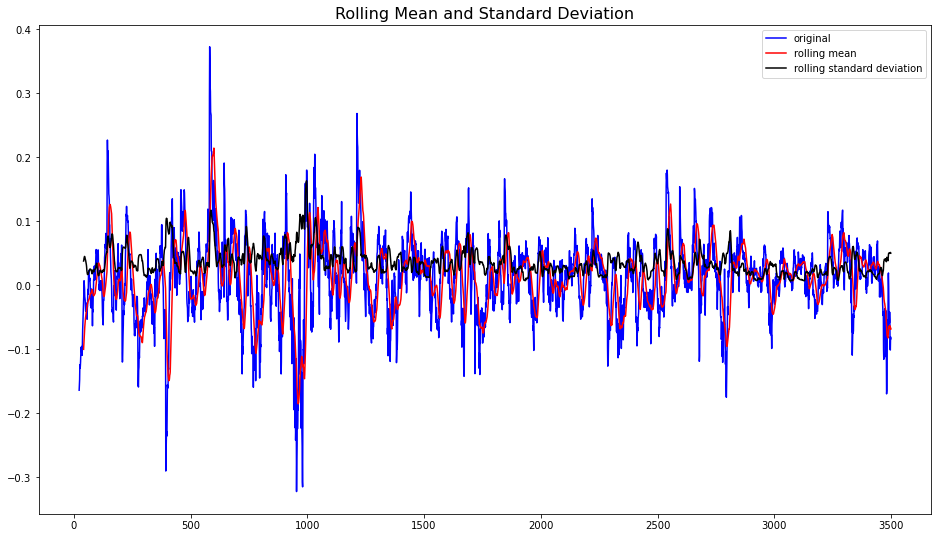

Results of dickey fuller test
ADF Test Statistic : -8.835545208592453
p-value : 1.723158197029407e-14
#Lags Used : 27
Number of Observations Used : 3449
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [52]:
train_log_diff= train_log-mav
train_log_diff.dropna(inplace=True)

test_stationarity(train_log_diff)

##### Training the historical model

In [53]:
## using auto arima to make predictions using log data

from pmdarima import auto_arima

model = auto_arima(train_log, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train_log)
predictions = model.predict(n_periods = len(test))
predictions = pd.DataFrame(predictions,index = test_log.index,columns=['Prediction'])


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-16033.381, Time=5.71 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-16029.587, Time=1.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-16027.591, Time=1.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-16027.592, Time=5.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-16025.668, Time=0.71 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-16035.191, Time=3.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-16037.170, Time=4.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-16035.179, Time=3.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-16025.664, Time=1.84 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-16033.127, Time=3.76 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-16032.516, Time=1.13 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 32.442 seconds


Text(0, 0.5, 'Actual Stock Price')

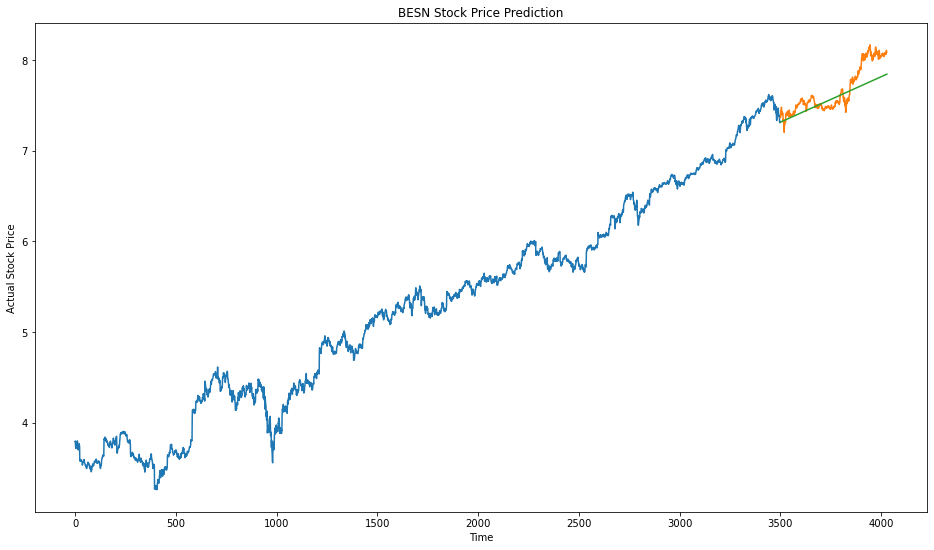

In [55]:
plt.figure(figsize=(16,9))
plt.plot(train_log, label='Train')
plt.plot(test_log, label='Test')
plt.plot(predictions, label='Prediction')
plt.title('BESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')

In [56]:
rms= np.sqrt(mean_squared_error(test_log, predictions))
print("RMSE : ",rms)

RMSE :  0.15965700800739027


#### Step 4:- Merge the Historical and Textual Data

In [60]:
df_merge= pd.merge(headlines_df, prices_df, how='inner',on='Date')
df_merge

,Date,headline,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,High,Low,Open,Close,Volume
0,2004-12-31,2000 migrant labourers lost IAF comes to rescu...,0.377969,0.000508,-0.9965,0.183,0.719,0.099,45.490002,44.160000,45.130001,44.290001,4790700
1,2005-01-03,ICAI compliments minister Partnering for futur...,0.406857,0.065283,-0.9926,0.152,0.750,0.098,45.439999,44.209999,44.950001,44.520000,10446500
2,2005-01-04,Arab Gaze Uniform Laws Tsunami Relief Double S...,0.369270,0.086762,-0.9097,0.084,0.846,0.069,43.259998,41.500000,42.669998,42.139999,19418500
3,2005-01-05,Quake Rumours Mishap reunites 12yr boy with fa...,0.417271,0.085289,-0.9955,0.152,0.746,0.101,42.759998,41.560001,41.570000,41.770000,8354200
4,2005-01-06,Doon School preparing to admit girls Market Ma...,0.353227,0.166925,0.6925,0.094,0.801,0.104,42.250000,40.900002,41.810001,41.049999,8700900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,2020-12-24,How to set the mood for sex during cold winter...,0.391801,0.049680,-0.9991,0.096,0.836,0.068,3202.000000,3169.000000,3193.899902,3172.689941,1451900
4025,2020-12-28,Horoscope Today 28 December 2020 Check astrolo...,0.412283,0.068677,-0.9998,0.142,0.765,0.093,3304.000000,3172.689941,3194.000000,3283.959961,5686800
4026,2020-12-29,Man recovers charred remains of thief from his...,0.423628,0.062355,-0.9999,0.153,0.751,0.096,3350.649902,3281.219971,3309.939941,3322.000000,4872900
4027,2020-12-30,Numerology Readings 30 December 2020 Predictio...,0.439721,0.041033,-0.9999,0.145,0.769,0.086,3342.100098,3282.469971,3341.000000,3285.850098,3209300


#### Step 5:- Creating Dataset for model training

In [61]:
df_final= df_merge[['Close','Subjectivity', 'Polarity','Compound','Negative','Neutral','Positive']]
df_final

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,44.290001,0.377969,0.000508,-0.9965,0.183,0.719,0.099
1,44.520000,0.406857,0.065283,-0.9926,0.152,0.750,0.098
2,42.139999,0.369270,0.086762,-0.9097,0.084,0.846,0.069
3,41.770000,0.417271,0.085289,-0.9955,0.152,0.746,0.101
4,41.049999,0.353227,0.166925,0.6925,0.094,0.801,0.104
...,...,...,...,...,...,...,...
4024,3172.689941,0.391801,0.049680,-0.9991,0.096,0.836,0.068
4025,3283.959961,0.412283,0.068677,-0.9998,0.142,0.765,0.093
4026,3322.000000,0.423628,0.062355,-0.9999,0.153,0.751,0.096
4027,3285.850098,0.439721,0.041033,-0.9999,0.145,0.769,0.086


#### Step 6:- Normalize Data

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

In [66]:
df= pd.DataFrame(scaler.fit_transform(df_final))
df.columns= df_final.columns
df.index= df_final.index

In [67]:
df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.005198,0.398534,0.168574,0.00175,0.597826,0.494983,0.276596
1,0.005263,0.491516,0.346158,0.00370,0.429348,0.598662,0.271277
2,0.004584,0.370537,0.405045,0.04515,0.059783,0.919732,0.117021
3,0.004479,0.525035,0.401007,0.00225,0.429348,0.585284,0.287234
4,0.004273,0.318899,0.624815,0.84625,0.114130,0.769231,0.303191


In [68]:
X= df.drop('Close',axis=1)
X

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.398534,0.168574,0.00175,0.597826,0.494983,0.276596
1,0.491516,0.346158,0.00370,0.429348,0.598662,0.271277
2,0.370537,0.405045,0.04515,0.059783,0.919732,0.117021
3,0.525035,0.401007,0.00225,0.429348,0.585284,0.287234
4,0.318899,0.624815,0.84625,0.114130,0.769231,0.303191
...,...,...,...,...,...,...
4024,0.443057,0.303382,0.00045,0.125000,0.886288,0.111702
4025,0.508981,0.355462,0.00010,0.375000,0.648829,0.244681
4026,0.545494,0.338132,0.00005,0.434783,0.602007,0.260638
4027,0.597293,0.279677,0.00005,0.391304,0.662207,0.207447


In [69]:
y= df['Close']
y

0       0.005198
1       0.005263
2       0.004584
3       0.004479
4       0.004273
          ...   
4024    0.897654
4025    0.929397
4026    0.940249
4027    0.929936
4028    0.921686
Name: Close, Length: 4029, dtype: float64

#### Step 7:-  Splitting the Data 

In [70]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=0)

#### Step 8:- Deploying Different models 

##### Applying Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred= rf.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_pred, y_test))

Mean Squared Error:  0.029255952125643265


##### Applying DecisionTreeRegressor 

In [80]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred= dt.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_pred, y_test))


Mean Squared Error:  0.05559582715630679


##### Applying AdaBoost Regressor


In [81]:
from sklearn.ensemble import AdaBoostRegressor
adb= AdaBoostRegressor()
adb.fit(X_train,y_train)
y_pred= adb.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_pred, y_test))

Mean Squared Error:  0.031996576929458787


##### Applying LGBMRegressor

In [83]:
import lightgbm
gbm= lightgbm.LGBMRegressor()
gbm.fit(X_train, y_train)
y_pred= gbm.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_pred, y_test))

Mean Squared Error:  0.029446202635770007


##### Applying XGBRegressor 

In [86]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost



In [88]:
import xgboost
xgb= xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
y_pred= xgb.predict(X_test)
print('Mean Squared Error: ',mean_squared_error(y_pred, y_test))

Mean Squared Error:  0.033283630008973726


### Conclusion:
##### RandomForestRegressor Model :- Mean Squared Error:  0.029255952125643265
##### DecisionTreeRegressor Model :- Mean Squared Error:  0.05559582715630679
##### AdaBoostRegressor Model :- Mean Squared Error:   0.031996576929458787
##### LGBM Model :- Mean Squared Error:  0.029446202635770007
##### XGBoost Model :- Mean Squared Error: 0.033283630008973726 

#### The best performing model is RandomForestRegressor